## 数据导入及处理

In [2]:
from feature_selector import FeatureSelector
import pandas as pd
import numpy as np

In [3]:
train = pd.read_table('cmc.data',sep=',',
                      names=['Wife age','Wife education','Husband education','Number of children ever born','Wife religion','Wife now working?' ,'Husband occupation','Standard-of-living index','Media exposure','method'])

In [4]:
train_labels = train['method']
train.head()

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working?,Husband occupation,Standard-of-living index,Media exposure,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [5]:
train = train.drop(columns = ['method'])

## 缺失值统计

In [6]:
fs = FeatureSelector(data = train, labels = train_labels)

In [7]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



## 单一唯一值统计

In [8]:
fs.identify_single_unique()

0 features with a single unique value.



## 高度相关属性统计

In [9]:
fs.identify_collinear(correlation_threshold=0.8)

0 features with a correlation magnitude greater than 0.80.



## 零重要性属性统计

In [10]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's l2: 0.752671
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's l2: 0.750117
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's l2: 0.755203
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's l2: 0.752313
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's l2: 0.75435
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's l2: 0.753379
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	val

## 绘制特征的重要性图表

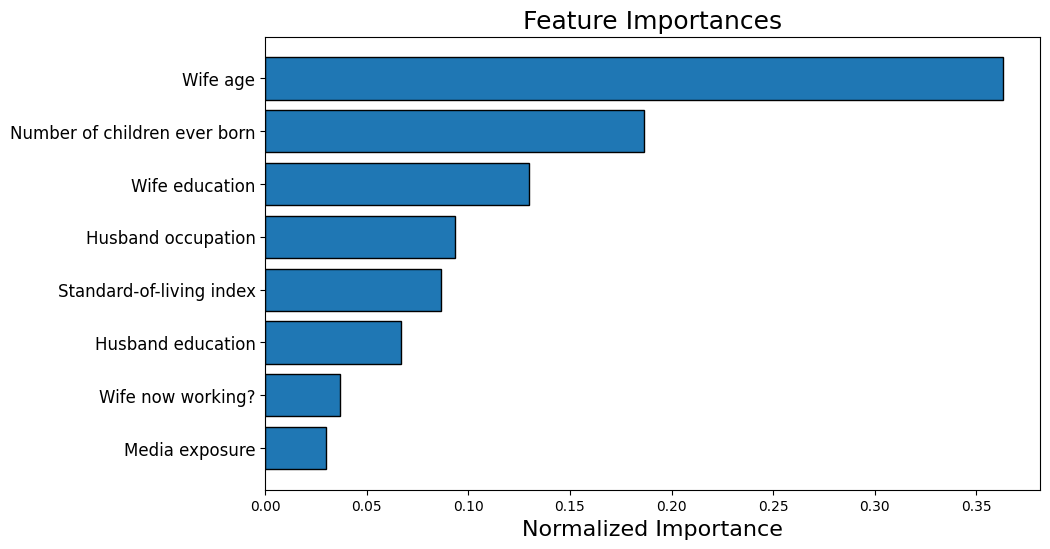

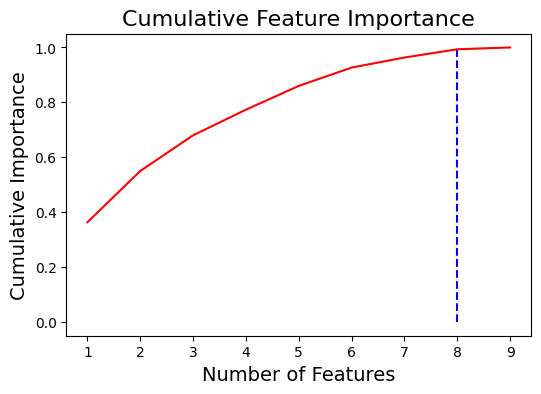

8 features required for 0.99 of cumulative importance


In [11]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 8)

In [12]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,Wife age,10.9,0.363333,0.363333
1,Number of children ever born,5.6,0.186667,0.550000
2,Wife education,3.9,0.130000,0.680000
3,Husband occupation,2.8,0.093333,0.773333
4,Standard-of-living index,2.6,0.086667,0.860000
5,Husband education,2.0,0.066667,0.926667
6,Wife now working?,1.1,0.036667,0.963333
7,Media exposure,0.9,0.030000,0.993333
8,Wife religion,0.2,0.006667,1.000000


## 特征删除

In [13]:
fs.identify_low_importance(cumulative_importance = 0.99)

7 features required for cumulative importance of 0.99 after one hot encoding.
2 features do not contribute to cumulative importance of 0.99.



In [14]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['Media exposure', 'Wife religion']

In [15]:
all_to_remove = fs.check_removal()
all_to_remove[:10]

Total of 2 features identified for removal


['Wife religion', 'Media exposure']

In [16]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 2 features.


In [17]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 2 features including one-hot features.


In [18]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 9
Final Number of Features:  7
